### Import libraries

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Create synthetic data

In [2]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [3]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [4]:
true_labels[:5]

array([1, 0, 2, 2, 2])

### Scale the data

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

The standard scaler class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:

In [6]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

### Set the parameters and cluster the data

1. **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

2. **n_clusters** sets k for the clustering step. This is the most important parameter for k-means.

3. **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

4. **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

In [7]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

Now that the k-means class is ready, the next step is to fit it to the data in scaled_features

In [8]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

Review the Sum of Squared Errors. 

In the context of K-means clustering, SSE is used to measure the amount of variance within the clusters. Specifically, it calculates the total squared distance between each data point and the center of the cluster (centroid) to which it has been assigned. The aim of K-means clustering is to minimize this error, meaning that the algorithm tries to create clusters such that the total intra-cluster variance (or, equivalently, the total distance of all points from their respective cluster centers) is as low as possible.

In [9]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [10]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [11]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [12]:
# The cluster assignments
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

### Choose the appropriate number of clusters

#### Elbow method

In [13]:
# Plotting the clustered data. kmeans_kwargs is a dictionary that contains the parameters for the KMeans object.

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # **kmeans_kwargs is used to pass the dictionary as arguments
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

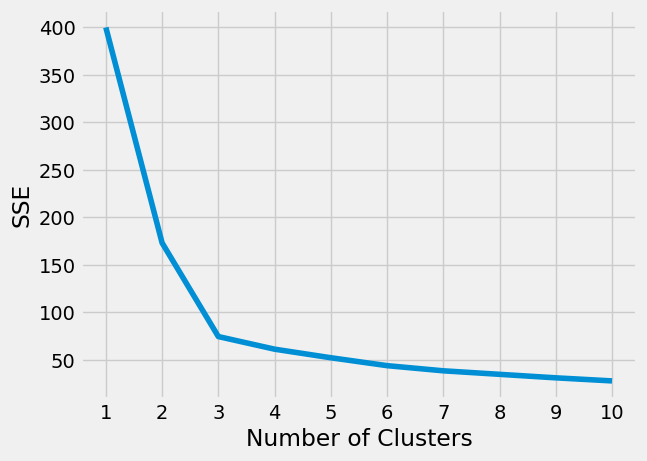

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Three is the ideal number.